# Project 2: Two Mode Network  
IS620 Web Analytics  
Aaron Palumbo | Partho Banarjee  

In [1]:
import IPython.display as dis
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Little more to add for generating graphs
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


## Data

#### Norwegian Interlocking Directorate (August 2009)

Excerpt from the data definition: 

> This website is the 2-year continuation of a research project on board memberships and gender in Norway. The main foundation of the paper is a gender representation law that required all public limited companies to compose their boards with at least 40% of each gender by January 2008. The paper attempted to stike a balance between the urgency of studying the gender represention law and the amount of data available (the analysis relied on data from August 2009).

> We collected a list of all the 384 public limited companies in Norway (Allmennaksjeselskap or ASA) that were available online through the Norwegian Business Register on August 5, 2009. We chose these companies as they are the ones bound by the gender representation law.

For this project, we chose to work with the data from Aug 2011. Further details about the data is as below:

In [2]:
dis.IFrame(src="http://www.boardsandgender.com/data.php",
           width=800, height=400)

## Data Preparation

#### Company Data

In [3]:
comDF = pd.read_csv("data_companies.txt", sep="\t", header=None, names=["companyID", "TaxID", "Company", "address"])
comDF.head()

,companyID,TaxID,Company,address
0,1,879447992,24SEVENOFFICE ASA,0667 OSLO
1,2,990031479,A-COM NORGE ASA,0355 OSLO
2,3,890687792,ABERDEEN EIENDOMSFOND ASIA ASA,0230 OSLO
3,4,989761390,ABERDEEN EIENDOMSFOND NORDEN/BALTIKUM ASA,0255 OSLO
4,5,988671258,ABERDEEN EIENDOMSFOND NORGE II ASA,0255 OSLO


#### Person Data

In [4]:
perDF = pd.read_csv("data_people.txt", sep=" ", header=None, names=["personID", "Name", "Gender"])
perDF.head()

,personID,Name,Gender
0,1,Aage Jakobsen,1
1,2,Aage Johan Rem�y,1
2,3,Aage Rasmus Bjelland Figenschou,1
3,4,Aagot Irene Skjeldal,2
4,5,Aase Gundersen,2


#### Board Data

The data below represents Company ID and Person ID.

In [5]:
netDF = pd.read_csv("net2m_2011-08-01.txt", sep=" ", header=None, names=["companyID", "personID"])
netDF.head()

,companyID,personID
0,1,2149
1,1,2910
2,1,3684
3,1,3754
4,2,766


In [6]:
print "The range of values for company are: {} to {}".format(netDF.companyID.min(), 
                                                             netDF.companyID.max())

The range of values for company are: 1 to 384


In [7]:
print "The range of IDs for person are: {} to {}".format(netDF.personID.min(),
                                                            netDF.personID.max())

The range of IDs for person are: 3 to 5766


#### Combine the datasets

In [8]:
mrgDF = pd.merge(netDF, comDF, on='companyID', how='inner')
mrgDF = pd.merge(mrgDF, perDF, on='personID', how='inner')
mrgDF.head()

,companyID,personID,TaxID,Company,address,Name,Gender
0,1,2149,879447992,24SEVENOFFICE ASA,0667 OSLO,Hilde Maren Haugnes Schjager,2
1,1,2910,879447992,24SEVENOFFICE ASA,0667 OSLO,Karl Anders Gr�nland,1
2,1,3684,879447992,24SEVENOFFICE ASA,0667 OSLO,Marte Kopperstad,2
3,1,3754,879447992,24SEVENOFFICE ASA,0667 OSLO,Michael Grant Jacobs,1
4,2,766,990031479,A-COM NORGE ASA,0355 OSLO,Bj�rn Ivar Carlsen,1


In [9]:
# Quick sense for the number of  overlaping values
sum([i in netDF.personID.values for i in netDF.companyID.values])

414

We can't add these to a networkx graph yet since it will treat the overlapping numbers as the same node. [Partho] AARON, NOT SURE WHAT YOU MEAN HERE.

#### Construct a directed graph

In [10]:
## we need to keep track separately of nodes of all types
persons=[]
companies=[]

In [11]:
mrgDF.dtypes

companyID     int64
personID      int64
TaxID         int64
Company      object
address      object
Name         object
Gender        int64
dtype: object

In [12]:
g = nx.from_pandas_dataframe(mrgDF,'companyID','personID','Gender')

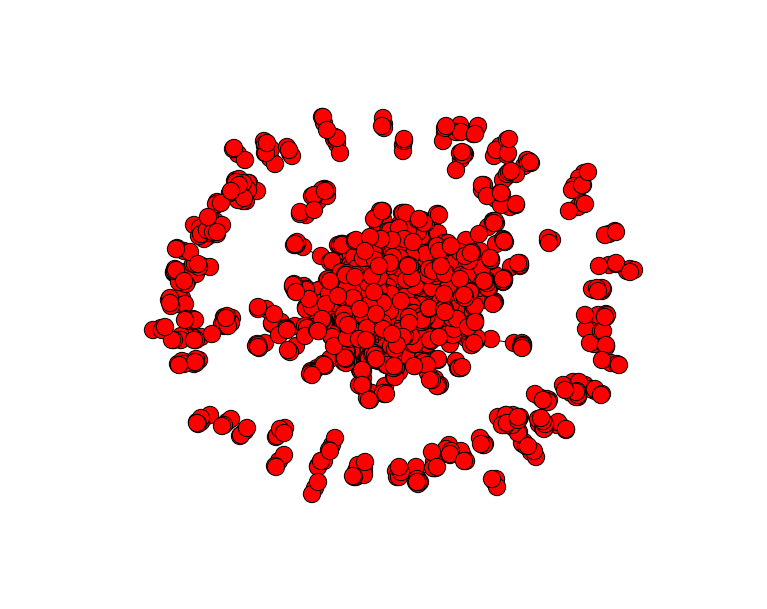

In [13]:
nx.draw(g)
plt.show()